<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab3_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1 - K-means from scratch**

In [96]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

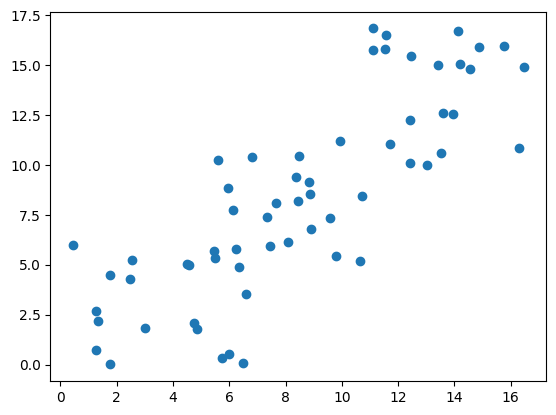

In [97]:
loaded_points = np.load('/content/drive/MyDrive/k_mean_points.npy')
plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [98]:
k = 3

In [99]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """
    #points.shape[0] number of rows
    #points.shape[1] number of columns
    ###################################
    # Write your own code here #
    row_indexes = np.random.choice(points.shape[0], size = k_clusters , replace = False)
    # pick 3 points in range num of rows as the center of the clusters, don't put the selected value back(replace = false)

    initial_clusters = points[row_indexes, :]

    ###################################

    return initial_clusters

In [100]:
ini_clusters = initialize_clusters(loaded_points, k)
initialize_clusters(loaded_points, k)

array([[ 8.42711609,  8.19761435],
       [ 7.66355388,  8.09644192],
       [13.5089918 , 10.59696052]])

In [101]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #

    distances_array = np.square(norm(points - centroid, axis = 1))



    ###################################

    return distances_array


In [102]:
calculate_metric(loaded_points, ini_clusters[0])

array([  5.54848843,  11.90757634,  32.35332738,  28.42203536,
        22.90214419,  71.16700404,   7.08885531,  28.25419346,
        42.28763337,  27.67362399,  22.36776228,   0.64758707,
        15.26699403,   0.        ,  33.98567146,  30.93823699,
        33.97043653,  41.6649473 ,   0.44903677,  27.69721011,
        89.72722247,  53.53878798, 106.08976304, 103.92690038,
        62.20586562,  87.61037188,  58.43951778,  87.38230976,
        65.1921344 ,  69.1794689 ,  42.97373689, 134.9679043 ,
        39.18760103,  32.51247391,  34.68271658,  50.24632038,
        77.00919051, 111.3071596 ,  76.61869639,  39.06986215,
       295.35110796, 318.52571168, 271.1081042 , 269.75342259,
       206.03090354, 334.38076406, 210.29750773, 182.74930702,
       159.17797472, 134.99604164, 141.08934024, 282.44389815,
       280.65886718, 265.82441132, 211.60249744, 272.96965735,
       319.9367406 , 337.71057473, 301.44300739, 146.83815692])

In [103]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #
    #distances_array = [calculate_metric(loaded_points, ini_clusters[0]),
    #calculate_metric(loaded_points, ini_clusters[1]),calculate_metric(loaded_points, ini_clusters[2])]
    distance_list =[]
    for centroid in centroids_points:
      distances = calculate_metric(points, centroid)
      distance_list.append(distances)

    distances_array = np.asarray(distance_list)

    distances_array = np.asarray([calculate_metric(points,centroid) for centroid in centroids_points])
    ###################################

    return distances_array

In [104]:
distances = compute_distances(loaded_points, ini_clusters )
compute_distances(loaded_points, ini_clusters )

array([[5.54848843e+00, 1.19075763e+01, 3.23533274e+01, 2.84220354e+01,
        2.29021442e+01, 7.11670040e+01, 7.08885531e+00, 2.82541935e+01,
        4.22876334e+01, 2.76736240e+01, 2.23677623e+01, 6.47587070e-01,
        1.52669940e+01, 0.00000000e+00, 3.39856715e+01, 3.09382370e+01,
        3.39704365e+01, 4.16649473e+01, 4.49036770e-01, 2.76972101e+01,
        8.97272225e+01, 5.35387880e+01, 1.06089763e+02, 1.03926900e+02,
        6.22058656e+01, 8.76103719e+01, 5.84395178e+01, 8.73823098e+01,
        6.51921344e+01, 6.91794689e+01, 4.29737369e+01, 1.34967904e+02,
        3.91876010e+01, 3.25124739e+01, 3.46827166e+01, 5.02463204e+01,
        7.70091905e+01, 1.11307160e+02, 7.66186964e+01, 3.90698622e+01,
        2.95351108e+02, 3.18525712e+02, 2.71108104e+02, 2.69753423e+02,
        2.06030904e+02, 3.34380764e+02, 2.10297508e+02, 1.82749307e+02,
        1.59177975e+02, 1.34996042e+02, 1.41089340e+02, 2.82443898e+02,
        2.80658867e+02, 2.65824411e+02, 2.11602497e+02, 2.729696

In [105]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis = 0)
    ###################################

    return assigned_centroids

In [106]:
assigned_centroid = assign_centroids(distances)

In [107]:
assigned_centroid

array([0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [108]:
def calculate_objective(assigned_centroids: np.array, distances: np.array) -> np.array:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #

    objective_function_value = 0.0
    n = assigned_centroids.shape[0]
    for i in range (n):
      column = distances[:,i]
      objective_function_value = objective_function_value + column[assigned_centroids[i]]


    ###################################

    return objective_function_value

In [109]:
calculate_objective(assigned_centroid,distances)

1605.7656308728597

In [110]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

      # Initialize an array to store the new centroids
    new_clusters = np.zeros((k_clusters, points.shape[1]))

    # Iterate over each cluster
    for cluster_index in range(k_clusters):
        # Get the indices of data points belonging to the current cluster
        cluster_indices = np.where(assigned_centroids == cluster_index)[0]

        # Extract the data points belonging to the current cluster
        cluster_points = points[cluster_indices,:]

        # Compute the mean of the data points along each dimension
        new_cluster_point = np.mean(cluster_points, axis=0)

        # Store the new centroid for the current cluster
        new_clusters[cluster_index,:] = new_cluster_point
    ###################################

    return new_clusters

In [111]:
calculate_new_centroids(loaded_points,assigned_centroid,3 )


array([[ 3.49184097,  2.70762529],
       [ 8.53335146,  5.7270839 ],
       [10.75870124, 11.38287706]])

In [112]:
def fit(points: np.array, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_iterations:  Maximum number of iterations
    :type n_of_iterations: int

    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective function

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float
    """
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = 10000.0

    for iteration in range(n_of_iterations):

        distances = compute_distances(points, centroid_points)

        assigned_centroids = assign_centroids(distances)

        objective_value = calculate_objective(assigned_centroids, distances)

        new_centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)

        if abs(objective_value - last_objective) < error:
            break

        centroid_points = new_centroids

        last_objective = objective_value

    return centroid_points, last_objective

In [113]:
fit(loaded_points, k, 100, 0.001)

(array([[ 7.7822904 ,  7.52348016],
        [13.24103172, 13.81011385],
        [ 3.49184097,  2.70762529]]),
 436.2519833332742)

# **Exercise 2 - Implementing an Elbow Method**

In [114]:
k_all = range(2, 10)
all_objective = []
for i in k_all:
  all_objective.append(fit(loaded_points, i, 100, 0.001)[1])

Text(0, 0.5, 'Sum of squared distance')

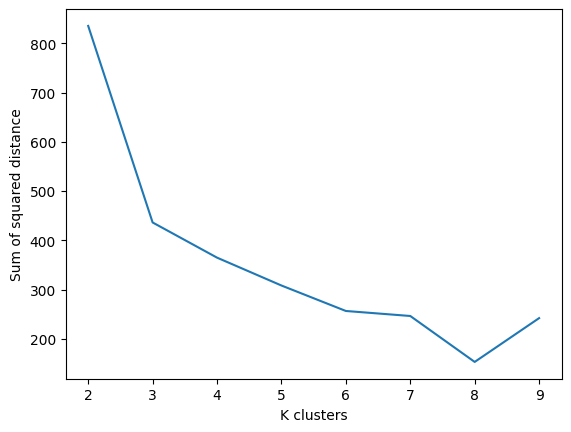

In [115]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# **Exercise 3 - Image Compression**

In [116]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

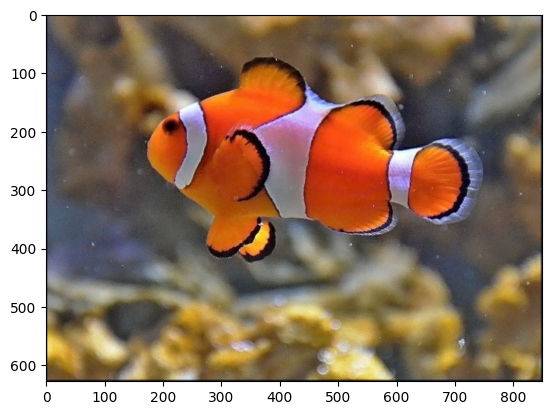

In [117]:
loaded_image = imread('/content/drive/MyDrive/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [118]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    height, width = image.shape[:2]
    reshaped_image = image.reshape((height * width, -1))

    kmeans = KMeans(n_clusters = number_of_colours, random_state=0, n_init="auto").fit(reshaped_image)

    cluster_centers = kmeans.cluster_centers_
    cluster_centers = cluster_centers.astype(int)
    labels = kmeans.labels_

    image = np.zeros_like(reshaped_image)

    for i in range(len(cluster_centers)):
      image[labels == i] = cluster_centers[i]

    image = image.reshape((height, width, -1))
    return image

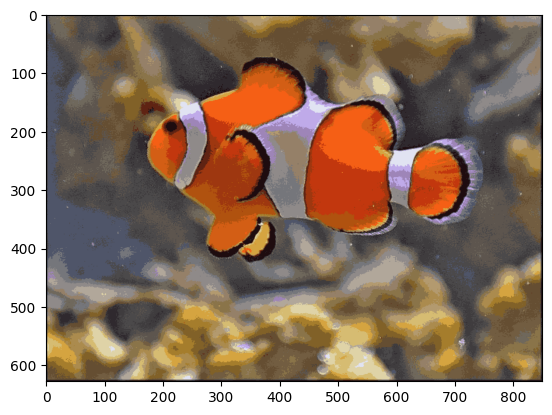

In [119]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()